### Importing the packages.

In [8]:
import numpy as np
import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import pandas_profiling
import seaborn as sns
import matplotlib as mat
import matplotlib.pyplot as plt
import bokeh
import sys
import os
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

### Loading data

In [52]:
df_cardata = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv',sep=',',encoding='latin-1')
df_cardata.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


### Rename columns

In [523]:
df_cardata.rename(columns={'car':'Brand', 'year':'ProductionYear'}, inplace=True)
df_cardata.shape

(9374, 11)

### Remove duplicate data

In [55]:
df_cardata.drop_duplicates(keep=False, inplace=True)
df_cardata.shape

(9375, 10)

This dataset had 201 duplicate rows.

### Data Profiling

In [56]:
df_cardata.columns

Index(['Brand', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'ProductionYear', 'model', 'drive'],
      dtype='object')

In [16]:
df_cardata.dtypes

Brand             object 
price             float64
body              object 
mileage           int64  
engV              float64
engType           object 
registration      object 
ProductionYear    int64  
model             object 
drive             object 
dtype: object

In [57]:
df_cardata.head()

,Brand,price,body,mileage,engV,engType,registration,ProductionYear,model,drive
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN
6,Honda,6500.0,sedan,199,2.0,Petrol,yes,2003,Accord,front
8,Mercedes-Benz,21500.0,sedan,146,1.8,Gas,yes,2012,E-Class,rear
9,Mercedes-Benz,22700.0,sedan,125,2.2,Diesel,yes,2010,E-Class,rear


In [18]:
df_cardata.tail()

,Brand,price,body,mileage,engV,engType,registration,ProductionYear,model,drive
9571,Hyundai,14500.0,crossover,140,2.0,Gas,yes,2011,Tucson,front
9572,Volkswagen,2200.0,vagon,150,1.6,Petrol,yes,1986,Passat B2,front
9573,Mercedes-Benz,18500.0,crossover,180,3.5,Petrol,yes,2008,ML 350,full
9574,Lexus,16999.0,sedan,150,3.5,Gas,yes,2008,ES 350,front
9575,Audi,22500.0,other,71,3.6,Petrol,yes,2007,Q7,full


In [58]:
df_cardata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9375 entries, 2 to 9575
Data columns (total 10 columns):
Brand             9375 non-null object
price             9375 non-null float64
body              9375 non-null object
mileage           9375 non-null int64
engV              8941 non-null float64
engType           9375 non-null object
registration      9375 non-null object
ProductionYear    9375 non-null int64
model             9375 non-null object
drive             8866 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 805.7+ KB


In [59]:
df_cardata.describe(include="all")

,Brand,price,body,mileage,engV,engType,registration,ProductionYear,model,drive
count,9375,9375.000000,9375,9375.000000,8941.000000,9375,9375,9375.000000,9375,8866
unique,87,NaN,6,NaN,NaN,4,2,NaN,888,3
top,Volkswagen,NaN,sedan,NaN,NaN,Petrol,yes,NaN,E-Class,front
freq,919,NaN,3601,NaN,NaN,4309,8814,NaN,188,5156
mean,NaN,15010.846384,NaN,140.751360,2.637962,NaN,NaN,2006.464107,NaN,NaN
std,NaN,22091.098664,NaN,98.345011,5.991054,NaN,NaN,7.059092,NaN,NaN
min,NaN,0.000000,NaN,0.000000,0.100000,NaN,NaN,1953.000000,NaN,NaN
25%,NaN,4999.000000,NaN,72.000000,1.600000,NaN,NaN,2004.000000,NaN,NaN
50%,NaN,9025.000000,NaN,130.000000,2.000000,NaN,NaN,2008.000000,NaN,NaN
75%,NaN,16300.000000,NaN,196.000000,2.500000,NaN,NaN,2012.000000,NaN,NaN


Here we can see that price and mileage columns have a minimum value of zero, zero values does not make sense and indicates an invalid or missing value.

In [25]:
df_cardata.isnull().sum()

Brand             0  
price             0  
body              0  
mileage           0  
engV              434
engType           0  
registration      0  
ProductionYear    0  
model             0  
drive             509
dtype: int64

From the above output we can see that engV and drive columns contains null values.

In [31]:
pre_profiling = pandas_profiling.ProfileReport(df_cardata)
pre_profiling.to_file(output_file="BeforePreprocessing.html")

In [60]:
df_cardata.drop(['model'], inplace=True, axis=1)
df_cardata.head(10)

,Brand,price,body,mileage,engV,engType,registration,ProductionYear,drive
2,Mercedes-Benz,35000.000,other,135,5.5,Petrol,yes,2008,rear
4,Mercedes-Benz,33000.000,vagon,91,NaN,Other,yes,2013,NaN
6,Honda,6500.000,sedan,199,2.0,Petrol,yes,2003,front
8,Mercedes-Benz,21500.000,sedan,146,1.8,Gas,yes,2012,rear
9,Mercedes-Benz,22700.000,sedan,125,2.2,Diesel,yes,2010,rear
10,Nissan,20447.154,crossover,0,1.2,Petrol,yes,2016,front
12,Mercedes-Benz,22500.000,sedan,164,1.8,Gas,yes,2012,rear
13,BMW,4700.000,sedan,200,NaN,Petrol,yes,1996,rear
14,Mercedes-Benz,21500.000,sedan,159,1.8,Gas,yes,2012,rear
15,BMW,19999.000,sedan,290,4.8,Petrol,yes,2006,rear


In [67]:
df_cardata['price'].astype(bool).sum(axis=0)

9151

In [124]:
df_cardata[df_cardata['price'].isnull()]

,Brand,price,body,mileage,engV,engType,registration,ProductionYear,drive
8824,Fisker,NaN,other,100.0,2.637962,Other,yes,2001,front


In [122]:
df_cardata['price'] = df_cardata['price'].replace(0, np.nan)

In [125]:
df_cardata['price'].fillna(df_cardata.groupby('Brand')['price'].transform('mean'), inplace=True)
df_cardata.head()

,Brand,price,body,mileage,engV,engType,registration,ProductionYear,drive
2,Mercedes-Benz,35000.0,other,135.0,5.500000,Petrol,yes,2008,rear
4,Mercedes-Benz,33000.0,vagon,91.0,2.637962,Other,yes,2013,front
6,Honda,6500.0,sedan,199.0,2.000000,Petrol,yes,2003,front
8,Mercedes-Benz,21500.0,sedan,146.0,1.800000,Gas,yes,2012,rear
9,Mercedes-Benz,22700.0,sedan,125.0,2.200000,Diesel,yes,2010,rear


In [127]:
df_cardata[df_cardata['price'].isnull()]

,Brand,price,body,mileage,engV,engType,registration,ProductionYear,drive
8824,Fisker,NaN,other,100.0,2.637962,Other,yes,2001,front


In [134]:
idx = df_cardata[df_cardata['price'].isnull()].index
idx

Int64Index([], dtype='int64')

In [139]:
df_cardata.drop(idx, inplace=True)
~df_cardata['price'].isnull().count()

-9375

In [69]:
df_cardata['mileage'].astype(bool).sum(axis=0)

9090

In [75]:
df_cardata[df_cardata['mileage'] == 0].count()

Brand             285
price             285
body              285
mileage           285
engV              266
engType           285
registration      285
ProductionYear    285
drive             272
dtype: int64

In [84]:
df_cardata['mileage'] = df_cardata['mileage'].replace(0,np.nan)     

In [95]:
df_cardata['mileage'].fillna(df_cardata.groupby('Brand')['mileage'].transform('mean'),inplace=True)

In [96]:
df_cardata[df_cardata['mileage'].isnull()]

,Brand,price,body,mileage,engV,engType,registration,ProductionYear,drive


In [98]:
df_cardata.isnull().sum()

Brand             0  
price             0  
body              0  
mileage           0  
engV              434
engType           0  
registration      0  
ProductionYear    0  
drive             509
dtype: int64

In [103]:
df_cardata['engV'].fillna(df_cardata['engV'].mean(), inplace=True)
df_cardata.isnull().sum(axis=0)

Brand             0  
price             0  
body              0  
mileage           0  
engV              0  
engType           0  
registration      0  
ProductionYear    0  
drive             509
dtype: int64

In [115]:
df_cardata['drive'].fillna(df_cardata['drive'].mode()[0], inplace=True)
df_cardata[df_cardata['drive'].isnull()]

,Brand,price,body,mileage,engV,engType,registration,ProductionYear,drive


In [116]:
df_cardata.isnull().sum(axis=0)

Brand             0
price             0
body              0
mileage           0
engV              0
engType           0
registration      0
ProductionYear    0
drive             0
dtype: int64

In [141]:
pandas_profiling.ProfileReport(df_cardata).to_file(output_file="PostProfiling.html")

In [142]:
df_cardata[df_cardata['price'] == 0]

,Brand,price,body,mileage,engV,engType,registration,ProductionYear,drive


In [143]:
df_cardata.describe(include='all')

,Brand,price,body,mileage,engV,engType,registration,ProductionYear,drive
count,9374,9374.000000,9374,9374.000000,9374.000000,9374,9374,9374.000000,9374
unique,86,NaN,6,NaN,NaN,4,2,NaN,3
top,Volkswagen,NaN,sedan,NaN,NaN,Petrol,yes,NaN,front
freq,919,NaN,3601,NaN,NaN,4309,8813,NaN,5664
mean,NaN,15517.081150,NaN,145.255332,2.637962,NaN,NaN,2006.464690,NaN
std,NaN,22168.588839,NaN,95.358965,5.851035,NaN,NaN,7.059242,NaN
min,NaN,259.350000,NaN,1.000000,0.100000,NaN,NaN,1953.000000,NaN
25%,NaN,5400.000000,NaN,80.000000,1.600000,NaN,NaN,2004.000000,NaN
50%,NaN,9500.000000,NaN,133.000000,2.000000,NaN,NaN,2008.000000,NaN
75%,NaN,16999.000000,NaN,196.000000,2.637962,NaN,NaN,2012.000000,NaN


## 4. Questions
### Q 1. Which brand of cars sold the most ?

In [157]:
df_cardata['Brand'].value_counts().nlargest()

Volkswagen       919
Mercedes-Benz    863
BMW              675
Toyota           520
VAZ              487
Name: Brand, dtype: int64

In [149]:
indexlist = df_cardata['Brand'].value_counts().nlargest().index
indexlist

Index(['Volkswagen', 'Mercedes-Benz', 'BMW', 'Toyota', 'VAZ'], dtype='object')

Text(0, 0.5, 'No. of vehicles')

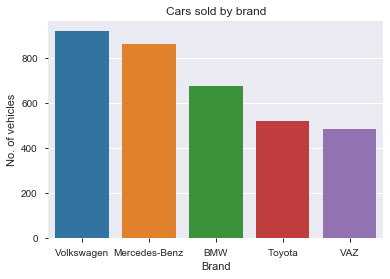

In [521]:
sns.countplot(x='Brand', data=df_cardata, order=indexlist)
plt.title("Cars sold by brand")
plt.xlabel("Brand")
plt.ylabel("No. of vehicles")

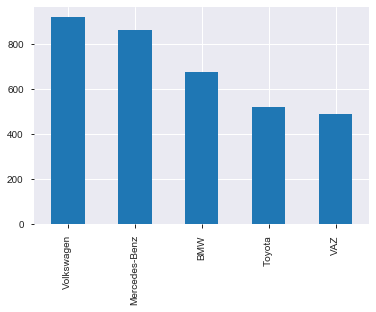

In [522]:
df_cardata['Brand'].value_counts().nlargest().plot.bar()

### Q 2. Which body segment of cars sold the most ?

In [155]:
df_cardata['body'].value_counts()

sedan        3601
crossover    1960
hatch        1244
van          1031
other        821 
vagon        717 
Name: body, dtype: int64

In [161]:
df_cardata['body'].value_counts().index

Index(['sedan', 'crossover', 'hatch', 'van', 'other', 'vagon'], dtype='object')

Text(0, 0.5, 'No. Of Cars')

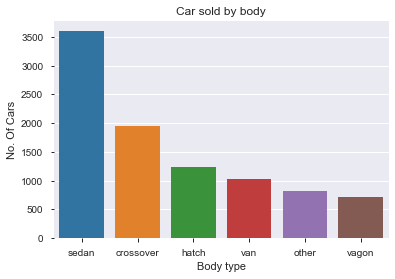

In [168]:
sns.countplot(x='body', data=df_cardata, order=df_cardata['body'].value_counts().index)
plt.title("Car sold by body")
plt.xlabel("Body type")
plt.ylabel("No. Of Cars")

Text(0, 0.5, '% of vehicles')

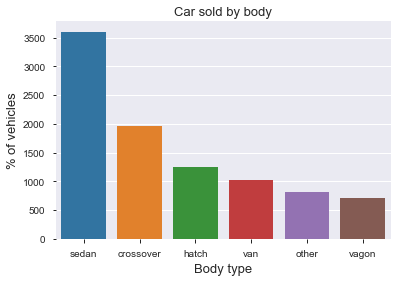

In [520]:
sns.countplot(x='body', data=df_cardata, order=(df_cardata['body'].value_counts()/len(df_cardata)*100).index)
#(df_cardata['body'].value_counts()/len(df_cardata)*100).plot.bar()
plt.title("Car sold by body", fontsize=13)
plt.xlabel("Body type", fontsize=13)
plt.ylabel("% of vehicles", fontsize=13)

### Q 3. Which drive segment of cars sold the most ?

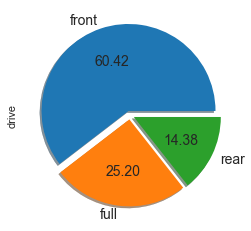

In [218]:
space = (0.05, 0.05, 0.05)
df_cardata['drive'].value_counts().plot(kind="pie", explode=space, 
                                        figsize=(4, 4), fontsize=14, 
                                        shadow=True, autopct='%.2f')

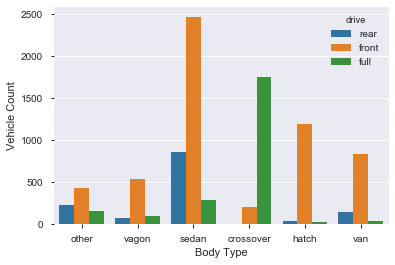

In [228]:
sns.countplot(x='body', data=df_cardata, hue='drive')
plt.xlabel("Body Type")
plt.ylabel("Vehicle Count")
plt.show()

In [236]:
pd.cut(df_cardata['price'],[0,20000,40000,60000,80000,100000,600000], 
       include_lowest=True).head(10)

2     (20000.0, 40000.0]
4     (20000.0, 40000.0]
6     (-0.001, 20000.0] 
8     (20000.0, 40000.0]
9     (20000.0, 40000.0]
10    (20000.0, 40000.0]
12    (20000.0, 40000.0]
13    (-0.001, 20000.0] 
14    (20000.0, 40000.0]
15    (-0.001, 20000.0] 
Name: price, dtype: category
Categories (6, interval[float64]): [(-0.001, 20000.0] < (20000.0, 40000.0] < (40000.0, 60000.0] < (60000.0, 80000.0] < (80000.0, 100000.0] < (100000.0, 600000.0]]

In [237]:
pd.cut(df_cardata['price'],[0,20000,40000,60000,80000,100000,600000], 
       labels = ['<20K','20-39K','40-59K','60-79K','80-99K','>100K'], include_lowest=True).head(10)

2     20-39K
4     20-39K
6     <20K  
8     20-39K
9     20-39K
10    20-39K
12    20-39K
13    <20K  
14    20-39K
15    <20K  
Name: price, dtype: category
Categories (6, object): [<20K < 20-39K < 40-59K < 60-79K < 80-99K < >100K]

In [248]:
df_cardata['price_group'] = pd.cut(df_cardata['price'],[0,20000,40000,60000,80000,100000,600000], 
                                   labels = ['<20K','20-39K','40-59K','60-79K','80-99K','>100K'], include_lowest=True)
df_cardata['price_group'] = df_cardata['price_group'].astype(object)  # making this column as object
df_cardata.head()

,Brand,price,body,mileage,engV,engType,registration,ProductionYear,drive,price_group
2,Mercedes-Benz,35000.0,other,135.0,5.500000,Petrol,yes,2008,rear,20-39K
4,Mercedes-Benz,33000.0,vagon,91.0,2.637962,Other,yes,2013,front,20-39K
6,Honda,6500.0,sedan,199.0,2.000000,Petrol,yes,2003,front,<20K
8,Mercedes-Benz,21500.0,sedan,146.0,1.800000,Gas,yes,2012,rear,20-39K
9,Mercedes-Benz,22700.0,sedan,125.0,2.200000,Diesel,yes,2010,rear,20-39K


Text(0.5, 1.0, 'Price group bar chart')

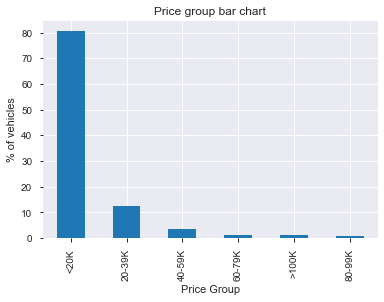

In [255]:
(df_cardata['price_group'].value_counts()/len(df_cardata)*100).plot(kind='bar')
plt.ylabel("% of vehicles")
plt.xlabel("Price Group")
plt.title("Price group bar chart")

Text(0.5, 1.0, 'Price group bar chart')

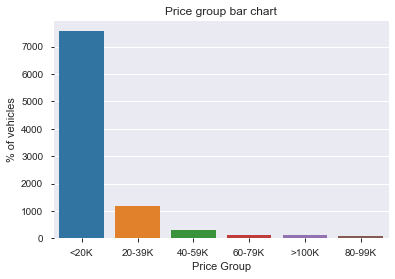

In [261]:
sns.countplot(x='price_group', data=df_cardata, 
              order=(df_cardata['price_group'].value_counts()/len(df_cardata)*100).index)
plt.ylabel("% of vehicles")
plt.xlabel("Price Group")
plt.title("Price group bar chart")

In [515]:
df_carprice = df_cardata[df_cardata['price'] >= 100000]
price_list=(df_carprice['Brand'].value_counts()/len(df_carprice)*100).index
print(price_list)
sns.countplot(y='Brand', data=df_carprice, order=price_list)
plt.title("Brand wise Sales Distribution in Higher Price Segment")
plt.xlabel('% of vehicles')
plt.ylabel('Brand type');


Index(['Mercedes-Benz', 'Land Rover', 'BMW', 'Tesla', 'Bentley', 'Lexus',
       'Toyota', 'Porsche', 'Rolls-Royce', 'Aston Martin', 'Ferrari', 'Nissan',
       'Maserati', 'Cadillac', 'Lamborghini', 'Ford'],
      dtype='object')


Text(, Brand, '')

ValueError: could not convert string to float: 

<Figure size 432x288 with 1 Axes>

### Q 5. How does price relate to body and drive type of car?

   <li> price group v/s body type

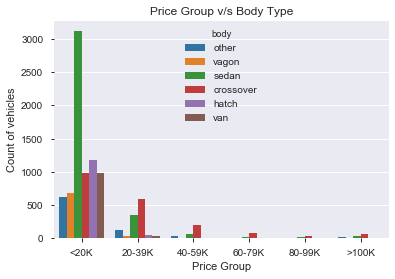

In [303]:
labels = ['<20K','20-39K','40-59K','60-79K','80-99K','>100K']
sns.countplot(x='price_group', data=df_cardata, order=labels, hue='body')
plt.title("Price Group v/s Body Type")
plt.xlabel('Price Group')
plt.ylabel('Count of vehicles');

<li> price group v/s drive type

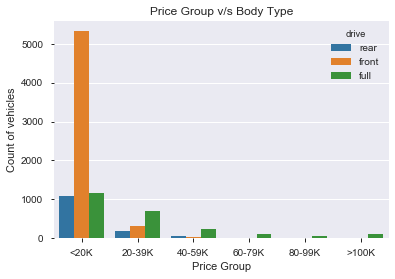

In [304]:
labels = ['<20K','20-39K','40-59K','60-79K','80-99K','>100K']
sns.countplot(x='price_group', data=df_cardata, order=labels, hue='drive')
plt.title("Price Group v/s Body Type")
plt.xlabel('Price Group')
plt.ylabel('Count of vehicles');

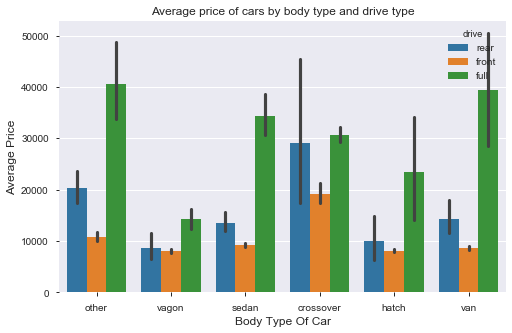

In [312]:
colors = ["#00e600", "#ff8c1a","#a180cc"]
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x='body', y='price', data=df_cardata, hue='drive')
ax.set_title("Average price of cars by body type and drive type", fontdict= {'size':12})
ax.xaxis.set_label_text("Body Type Of Car",fontdict= {'size':12})
ax.yaxis.set_label_text("Average Price",fontdict= {'size':12})
plt.show()

### Q 6. Does the engType have any impact on price of the car?

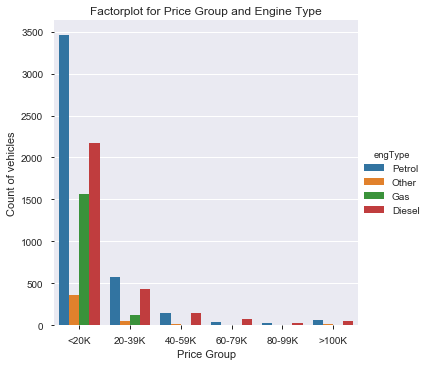

In [315]:
orderList = ['<20K','20-39K','40-59K','60-79K','80-99K','>100K']
sns.catplot(x='price_group', data=df_cardata, hue='engType', kind= 'count', order=orderList)   
plt.title('Factorplot for Price Group and Engine Type')
plt.xlabel('Price Group')
plt.ylabel('Count of vehicles');

### Q 7. How does price relate to engine type (engType) and drive type of the car?

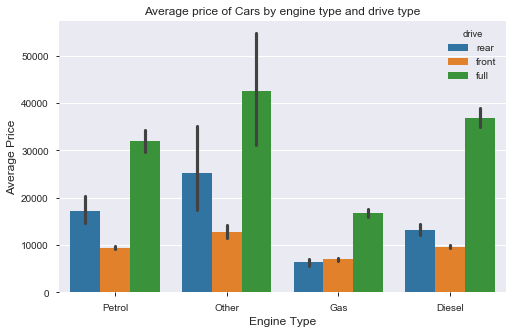

In [317]:
colors = ["#00e600", "#ff8c1a","#a180cc"]
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x='engType', y='price', data=df_cardata, hue='drive')
ax.set_title("Average price of Cars by engine type and drive type", fontdict= {'size':12})
ax.xaxis.set_label_text("Engine Type",fontdict= {'size':12})
ax.yaxis.set_label_text("Average Price",fontdict= {'size':12})
plt.show()

In [319]:
df_cardata.describe()

,price,mileage,engV,ProductionYear
count,9374.000000,9374.000000,9374.000000,9374.000000
mean,15517.081150,145.255332,2.637962,2006.464690
std,22168.588839,95.358965,5.851035,7.059242
min,259.350000,1.000000,0.100000,1953.000000
25%,5400.000000,80.000000,1.600000,2004.000000
50%,9500.000000,133.000000,2.000000,2008.000000
75%,16999.000000,196.000000,2.637962,2012.000000
max,547800.000000,999.000000,99.990000,2016.000000


### Q 8. Which engine volume (engV) cars sold the most ?

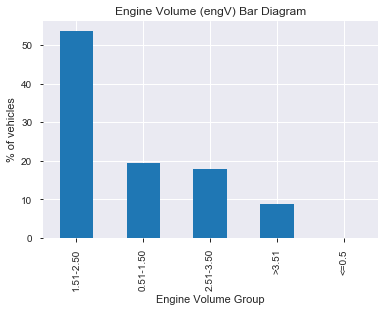

In [352]:
lab=['<=0.5','0.51-1.50','1.51-2.50','2.51-3.50','>3.51']
bins=[0,0.51,1.51,2.51,3.51,100]

(pd.cut(df_cardata['engV'], bins, labels=lab).value_counts()/len(df_cardata['engV'])*100).plot.bar()
plt.title("Engine Volume (engV) Bar Diagram")
plt.ylabel('% of vehicles')
plt.xlabel('Engine Volume Group');

In [ ]:
pd.cut(df_cardata['price'],[0,20000,40000,60000,80000,100000,600000], 
       labels = ['<20K','20-39K','40-59K','60-79K','80-99K','>100K'], include_lowest=True).head(10)

In [365]:
df_cardata['engV_categ'] = pd.cut(df_cardata['engV'], bins, labels=lab)
df_cardata['engV_categ'] = df_cardata['engV_categ'].astype(object)
df_cardata.head()

,Brand,price,body,mileage,engV,engType,registration,ProductionYear,drive,price_group,engV_categ
2,Mercedes-Benz,35000.0,other,135.0,5.500000,Petrol,yes,2008,rear,20-39K,>3.51
4,Mercedes-Benz,33000.0,vagon,91.0,2.637962,Other,yes,2013,front,20-39K,2.51-3.50
6,Honda,6500.0,sedan,199.0,2.000000,Petrol,yes,2003,front,<20K,1.51-2.50
8,Mercedes-Benz,21500.0,sedan,146.0,1.800000,Gas,yes,2012,rear,20-39K,1.51-2.50
9,Mercedes-Benz,22700.0,sedan,125.0,2.200000,Diesel,yes,2010,rear,20-39K,1.51-2.50


Text(0.5, 1.0, 'Engine Volume (engV) Bar chart')

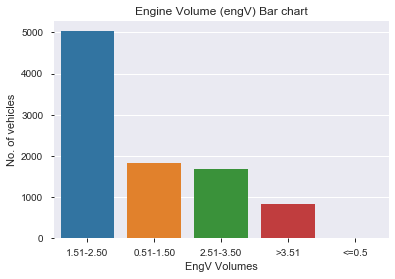

In [384]:
olist=(df_cardata['engV_categ'].value_counts()/len(df_cardata['engV_categ']*100)).index
sns.countplot(x='engV_categ', data=df_cardata, order=olist)
plt.ylabel("No. of vehicles")
plt.xlabel("EngV Volumes")
plt.title("Engine Volume (engV) Bar chart")

(0, 6)

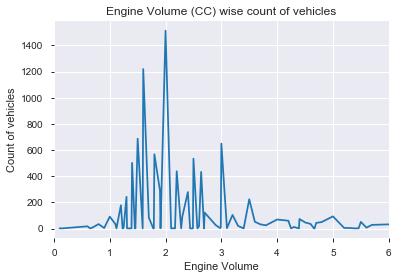

In [388]:
# engine volume wise count of vehicles
careng = df_cardata.loc[df_cardata['engV'] <= 6]
careng['engV'].value_counts().sort_index().plot.line()
plt.title("Engine Volume (CC) wise count of vehicles")
plt.ylabel('Count of vehicles')
plt.xlabel('Engine Volume');
plt.xlim(0,6)

### Q 9. How does engine volume (engV) relate to mileage of the car?

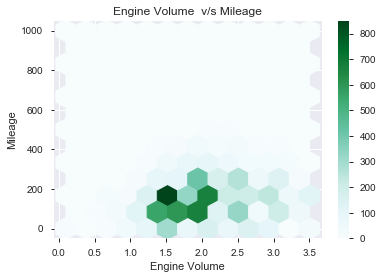

In [396]:
df_cardata[df_cardata['engV'] < 3.51].plot.hexbin(x='engV', y='mileage', sharex=False, gridsize=12)
plt.title("Engine Volume  v/s Mileage")
plt.ylabel('Mileage')
plt.xlabel('Engine Volume');

### Q 10. How does price is relate to mileage and production year of the car?

Text(0, 0.5, 'Mileage')

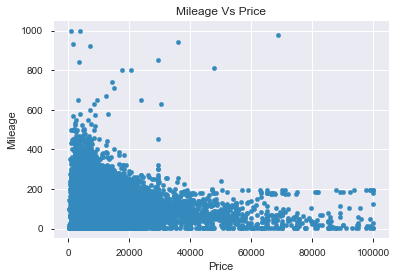

In [420]:
df_cardata[df_cardata['price'] < 100000 ].plot.scatter(x='price', y='mileage')
plt.title("Mileage Vs Price")
plt.xlabel("Price")
plt.ylabel("Mileage")

Text(0, 0.5, 'Price')

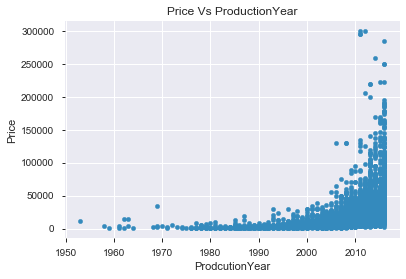

In [433]:
df_cardata[df_cardata['price'] <= 300000].plot.scatter(y='price', x='ProductionYear')
plt.title("Price Vs ProductionYear")
plt.xlabel("ProdcutionYear")
plt.ylabel("Price")

### Q 11. Which production year of cars sold the most ?

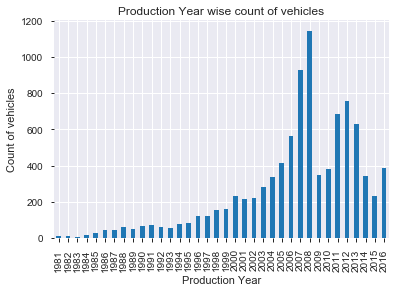

In [455]:
df_prdYear = df_cardata[df_cardata['ProductionYear'] > 1980]
df_prdYear['ProductionYear'].value_counts().sort_index().plot(kind='bar')
#df_prdYear['ProductionYear'].value_counts().index
#sns.countplot(y="ProductionYear", data=df_prdYear, order=df_prdYear['ProductionYear'].value_counts().sort_index().index)

plt.title("Production Year wise count of vehicles")
plt.ylabel('Count of vehicles')
plt.xlabel('Production Year');

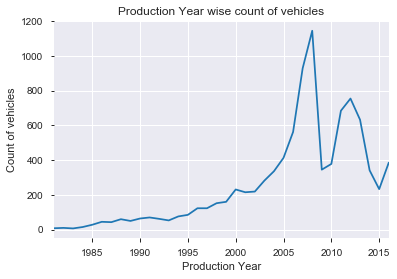

In [454]:
df_prdYear = df_cardata[df_cardata['ProductionYear'] > 1980]
df_prdYear['ProductionYear'].value_counts().sort_index().plot(kind='line')
plt.title("Production Year wise count of vehicles")
plt.ylabel('Count of vehicles')
plt.xlabel('Production Year');

### Q 12. How does production year relate to registration?

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 <a list of 7 Text yticklabel objects>)

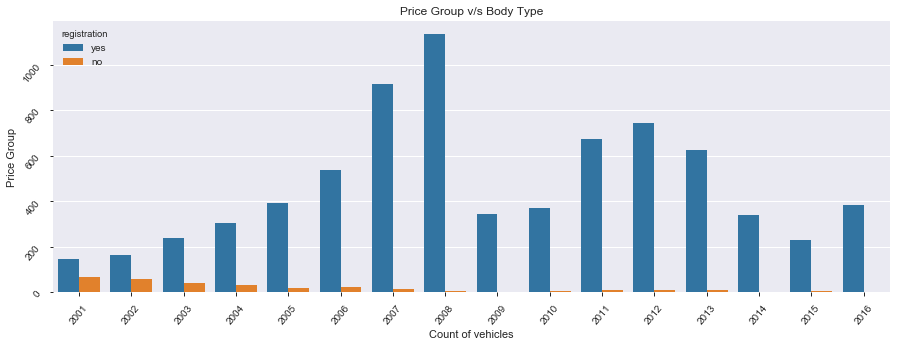

In [512]:
df_reg = df_cardata[df_cardata['ProductionYear'] > 2000]
plt.figure(figsize=(15,5))
g = sns.countplot(x='ProductionYear',data=df_reg.sort_index(), hue='registration')           
plt.title("Price Group v/s Body Type")
plt.ylabel('Price Group')
plt.xlabel('Count of vehicles');

plt.xticks(rotation=50)
plt.yticks(rotation=50)

#yearLabel = df_cardata[df_cardata['ProductionYear'] > 2000]['ProductionYear'].sort_values().unique()
#g.set_xticklabels(yearLabel, rotation=50)

In [467]:
df_reg[df_reg['registration'] == 'no'].count()

Brand             561
price             561
body              561
mileage           561
engV              561
engType           561
registration      561
ProductionYear    561
drive             561
price_group       561
engV_categ        561
dtype: int64

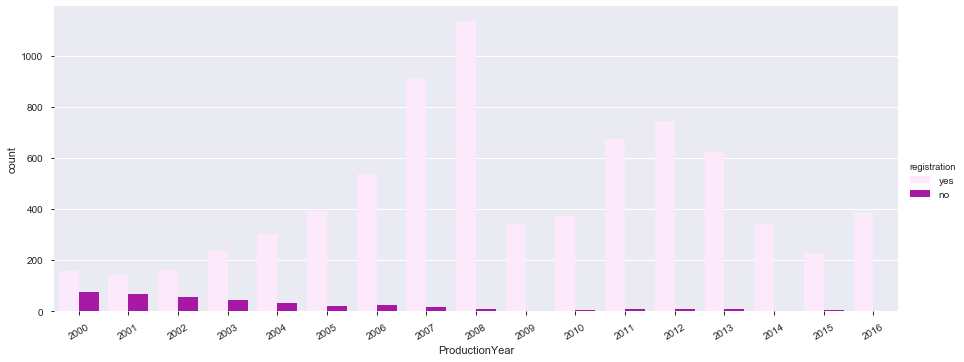

In [497]:
# Production year v/s registration
cc = df_cardata.loc[df_cardata['ProductionYear'] >= 2000]

g = sns.factorplot('ProductionYear',data=cc,aspect=2.5, kind='count',hue='registration' ,color="m")
g.set_xticklabels(rotation=30)

### Q 13. Correlation between various features of car data.

Text(0.5, 1, 'Correlation between various features of car')

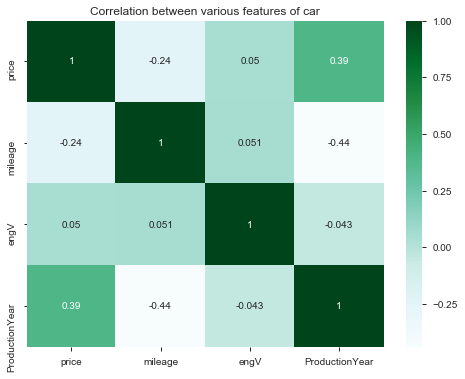

In [508]:
plt.figure(figsize=(8,6))
sns.heatmap(df_cardata.corr(), vmax=1,  annot=True, cmap='BuGn')
plt.title("Correlation between various features of car")